In [1]:
# First let's start with calling all the dependencies for this project 
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   Insulin                   768 non-null    int64  
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Age                       768 non-null    int64  
 5   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


In [5]:
df.describe()
#aiming to impute nan values for the columns in accordance 
#with their distribution
df[['Glucose','Insulin','BMI']].replace(0,np.NaN)

,Glucose,Insulin,BMI
0,148.0,NaN,33.6
1,85.0,NaN,26.6
2,183.0,NaN,23.3
3,89.0,94.0,28.1
4,137.0,168.0,43.1
...,...,...,...
763,101.0,180.0,32.9
764,122.0,NaN,36.8
765,121.0,112.0,26.2
766,126.0,NaN,30.1


In [6]:
columns = ['Glucose','Insulin','BMI']
for col in columns:
    val = df[col].mean()
    df[col].replace(0, val)

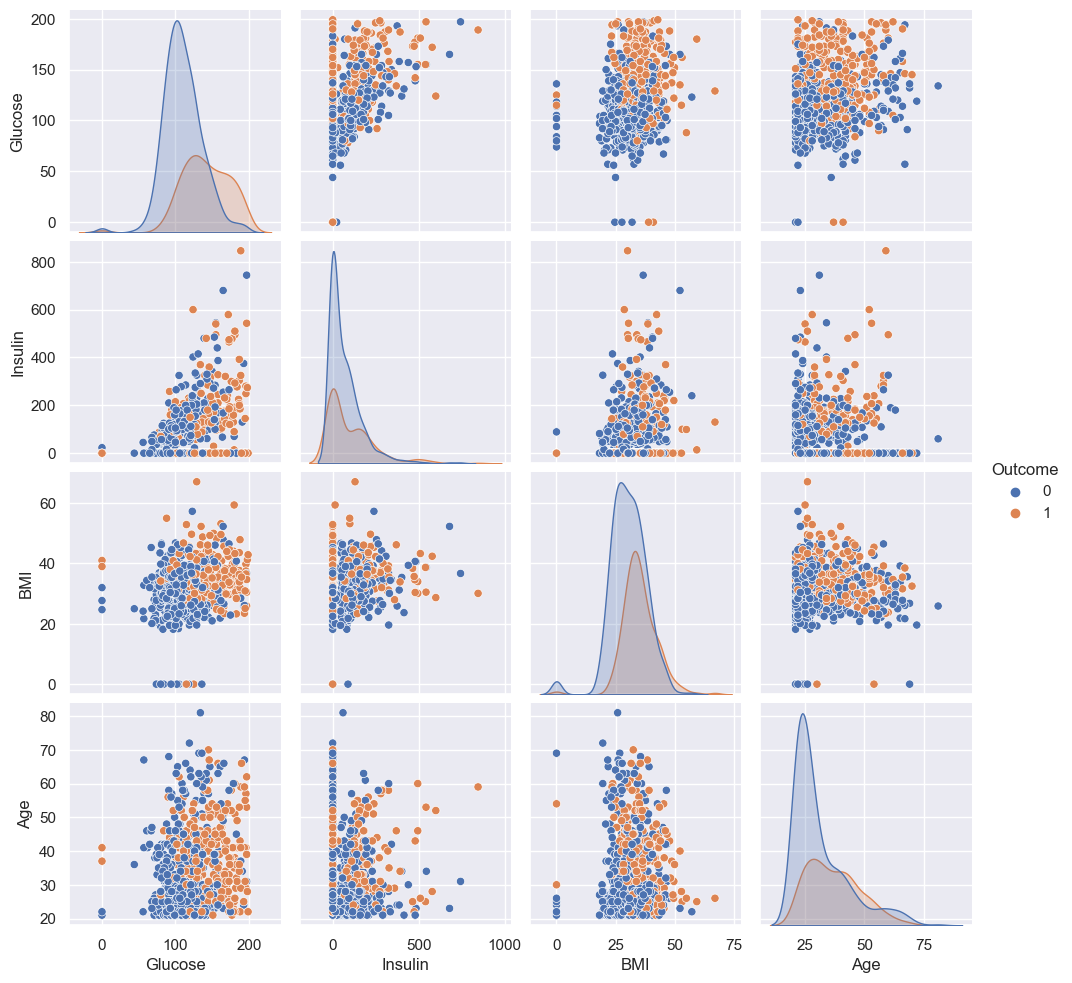

In [7]:
#plot graph
graph = ['Glucose','Insulin','BMI','Age','Outcome']
sns.set()
print(sns.pairplot(df[graph],hue='Outcome', diag_kind='kde'))

In [8]:
#separate outcome or target col
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [12]:
# feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [14]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
# evaluating model

conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[93 14]
 [18 29]]
0.6444444444444444


In [17]:
# accuracy

print(accuracy_score(y_test,y_pred))

0.7922077922077922


In [18]:
# roc curve 
from sklearn.metrics import roc_curve
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
from sklearn.metrics import roc_auc_score

<Figure size 640x480 with 0 Axes>

In [19]:
temp=roc_auc_score(y_test,y_pred)

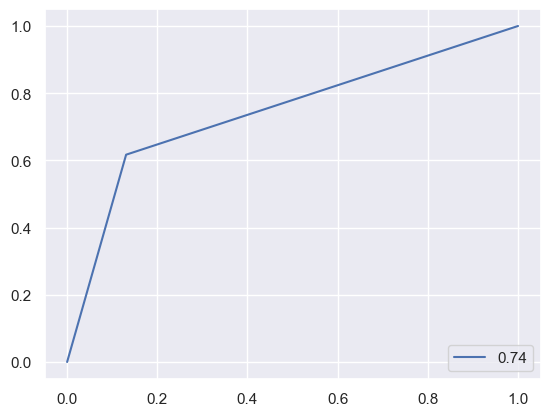

In [20]:
plt.plot(fpr,tpr,label = "%.2f" %temp)
plt.legend(loc = 'lower right')
plt.grid(True)